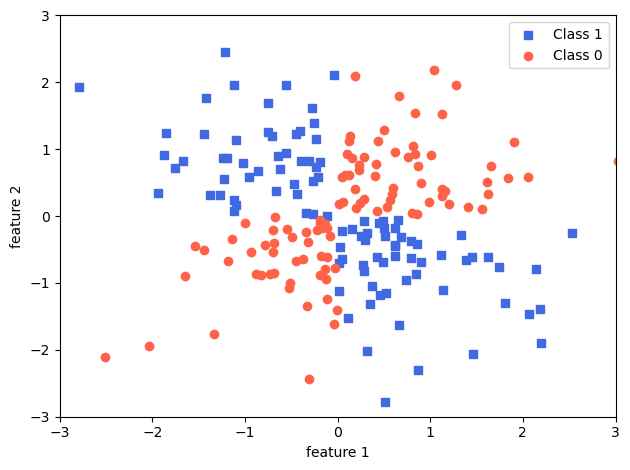

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor = np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor==1,0],
            X_xor[y_xor==1,1],
            c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor==0,0],
            X_xor[y_xor==0,1],
            c='tomato', marker='o', label='Class 0')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc ='best')
plt.tight_layout()
plt.show()



In [2]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02, test_idx = None):
    markers = ('o','s','^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max, resolution),
                        np.arange(x2_min,x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label = f'Class {cl}',
                    edgecolor = 'black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1,marker='o',
                    s=100,label='Test set')


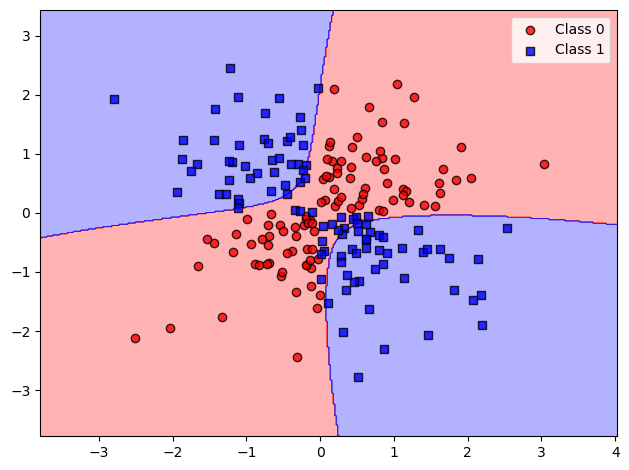

In [3]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10.0, random_state=1, gamma=0.10)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,classifier=svm)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
